# Customer Churn analysis using Machine Learning



It has become an important task for companies to understand customer behavior, as this allows them to acquire new prospects. But since acquiring a customer is more difficult than retaining one, companies are looking for different ways to identify when a customer has a high probability of churn and implement retention measures to maintain their monthly revenue.
The objective of this work is to explore the application of different machine learning models to predict churn-prone customers on a dataset from a communications company.


**#Data set Characteristics**
*   customerID: Customer ID
*   gender: Whether the customer is a male or a female
*   Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
*   Partner: Whether the customer has a partner or not (Yes, No)
*   Dependents: Whether the customer has dependents or not (Yes, No)
*   tenure: Number of months the customer has stayed with the company
*   Phone Service: Whether the customer has a phone service or not (Yes, No)
*   Multiple Lines: Whether the customer has multiple lines or not (Yes, No, No phone service)
*   Internet Service: Customer’s internet service provider (DSL, Fiber optic, No)
*   Online Security: Whether the customer has online security or not (Yes, No, No internet service)
*   Online Backup: Whether the customer has online backup or not (Yes, No, No internet service)
*   Device Protection: Whether the customer has device protection or not (Yes, No, No internet service)
*   Tech Support: Whether the customer has tech support or not (Yes, No, No internet service)
*   StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
*   Streaming: Whether the customer has streaming movies or not (Yes, No, No internet service)
*  Contract: The contract term of the customer (Month-to-month, One year, Two year)
*   Paperless Billing: Whether the customer has paperless billing or not (Yes, No)
*   Payment Method: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   Monthly Charges: The amount charged to the customer monthly
*   Total Charges: The total amount charged to the customer
*   Churn Label: Whether the customer churned or not (Yes or No)



**The dataset was published by IBM and corresponds to
customer churn or exit at a communications company. It
consists of 7043 records with 21 characteristics each, of which 20 are the descriptor variables,
such as gender, socioeconomic characteristics and the different
services purchased with the brand, the last one is the target
variable named "Churn".**

**Download Link** https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import  Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error #Metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import base64

# Tool for data interpretability
!pip install facets-overview==1.1.1
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator
from IPython.core.display import display, HTML

In [ ]:
churnData = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

churnData

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Exploratory Data Analysis

In [ ]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churnData.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
print(churnData.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
duplicate_rows_df = churnData[churnData.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [ ]:
churnData.count()   # Count values.

,0
customerID,7043
gender,7043
SeniorCitizen,7043
Partner,7043
Dependents,7043
tenure,7043
PhoneService,7043
MultipleLines,7043
InternetService,7043
OnlineSecurity,7043


In [ ]:
churnData['Churn'].value_counts() #Imbalance data

,count
Churn,
No,5174
Yes,1869


### Facets Data Visualization

In [ ]:
#Facets Visualization only works in local or using google colab
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': churnData, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

We need to convert the variable totalCharges from categorical to numeric

In [ ]:
churnData = churnData.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
#Convert TotalCharges to numeric
df = churnData.assign(
    TotalCharges = pd.to_numeric(churnData['TotalCharges'].str.replace('[^0-9.]', ''))
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


TotalCharges variable had 11 missing values,
which correspond to customers with a tenure of less than one
month, so it was decided to fill these empty fields with the
MonthlyCharges values.

In [ ]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [ ]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


As for outliers, none were observed in the numerical
variables, and the categorical variables were
normally distributed between 2 and 4 classes each

<Axes: xlabel='TotalCharges'>

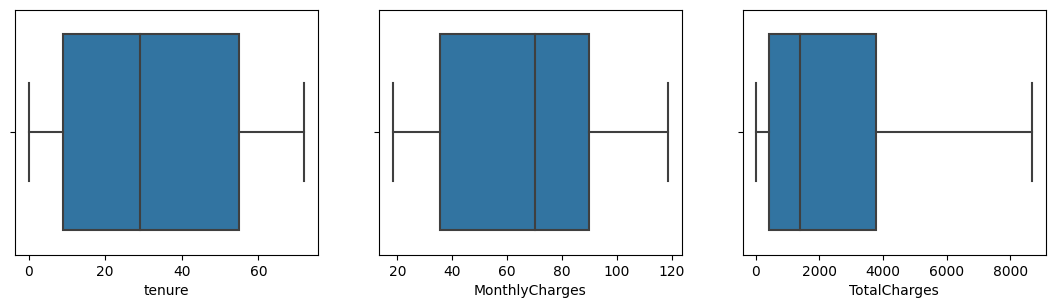

In [ ]:
#Outlier detection with BoxPlot
plt.rcParams['figure.figsize'] = (18,7)
plt.subplot(2,4,1)
sns.boxplot(x=df['tenure'])

plt.subplot(2,4,2)
sns.boxplot(x=df['MonthlyCharges'])

plt.subplot(2,4,3)
sns.boxplot(x=df['TotalCharges'])

**Correlation Analysis.**
From the point of view of data correlation, there is a strong relationship between Tenure and TotalCharges, since the more months the customer has been with the company, the higher the total expense of that customer.

<ipython-input-11-d1c7bc60b209>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


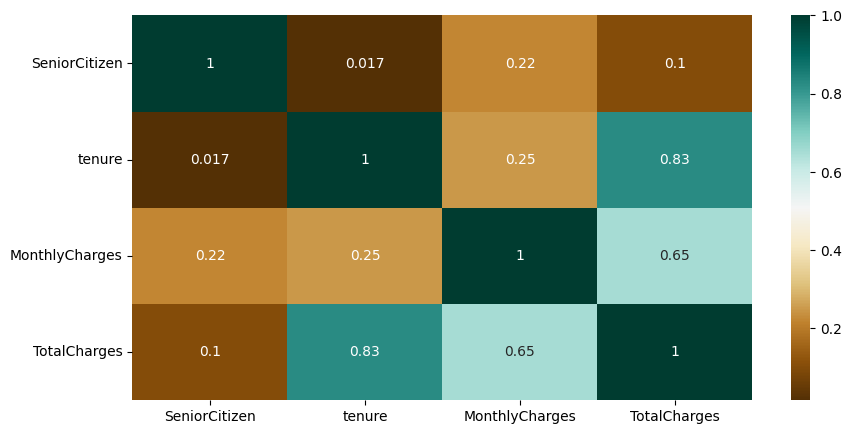

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

For the probability distribution, an overlap is observed in
the two classes, which indicates that the
dataset is highly complex, since the classes of the target
variable do not present visible separability in the data.

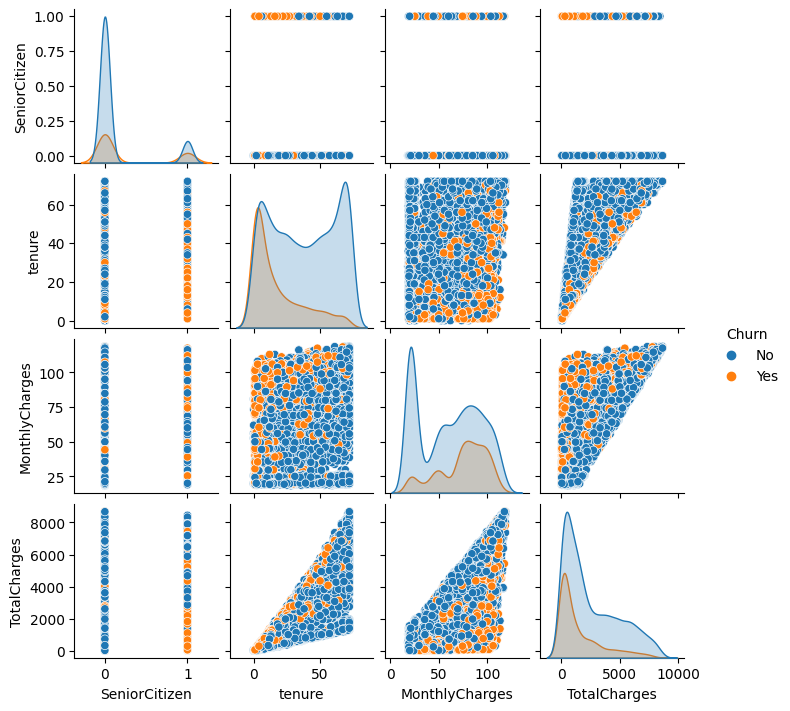

In [ ]:
sns.pairplot(df,hue="Churn",height=1.8)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
#Delete customerID column, since it does not provide relevant information for the analysis.
df = df.drop(columns=['customerID'])#

In [ ]:
#Select categorical variables
categoricalVariables =  df.select_dtypes(include='object')

In [ ]:
print(categoricalVariables)

In [ ]:
#Label Encoders
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    #label_encoders[column] = le

In [ ]:
feature_names_categorical = categoricalVariables.columns.tolist()
print(feature_names_categorical)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
for column in feature_names_categorical:
    onehotencoder = OneHotEncoder()
    encodings = onehotencoder.fit_transform(df[column].values.reshape(-1,1)).toarray()
    values = df[column].unique()

    for val in values:
      if val !=0.0:
        df[column +"_" + str(val)] = encodings[:,val]

    df = df.drop([column] , axis = 1)

In [ ]:
print(df.head(20))
newlist = df.columns.tolist()
print(newlist)

In [ ]:
#['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_1', 'Partner_1', 'Dependents_1', 'PhoneService_1', 'MultipleLines_1', 'MultipleLines_2', 'InternetService_1', 'InternetService_2', 'OnlineSecurity_2', 'OnlineSecurity_1', 'OnlineBackup_2', 'OnlineBackup_1', 'DeviceProtection_2', 'DeviceProtection_1', 'TechSupport_2', 'TechSupport_1', 'StreamingTV_2', 'StreamingTV_1', 'StreamingMovies_2', 'StreamingMovies_1', 'Contract_1', 'Contract_2', 'PaperlessBilling_1', 'PaymentMethod_2', 'PaymentMethod_3', 'PaymentMethod_1', 'Churn_1']


In [ ]:
x = df.drop(columns=['Churn_1'])
y = df['Churn_1']

In [ ]:
print(x)

In [ ]:
x = x.values
y= y.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#USE KFOLD WITH BEST MODEL

In [ ]:
##Check for Imbalanced data
unique, frequency = np.unique(y_train,
                              return_counts = True)
# convert to numpy array
count = np.asarray((unique, frequency ))
print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[0.000e+00 1.000e+00]
 [4.138e+03 1.496e+03]]


In [ ]:
print(x[0].shape)

(30,)


In [ ]:
#OVERSAMPLING Imbalance data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_resample(x_train, y_train)

print(X_ros.shape[0] - x_train.shape[0], 'new random picked points')

2642 new random picked points


In [ ]:
unique, frequency = np.unique(Y_ros,
                              return_counts = True)

# convert to numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[0.000e+00 1.000e+00]
 [4.138e+03 4.138e+03]]


In [ ]:
#OVERSAMPLING2 with SMOTE
from imblearn.over_sampling import SMOTE
#sampling_strategy='minority'
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(x_train, y_train)

In [ ]:
unique, frequency = np.unique(y_sm,
                              return_counts = True)

# convert to numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[0.000e+00 1.000e+00]
 [4.138e+03 4.138e+03]]


In [ ]:
X_sm.shape

(8276, 30)

In [ ]:
#UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(x_train, y_train)

In [ ]:
unique, frequency = np.unique(y_rus,
                              return_counts = True)

# convert to numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[0.000e+00 1.000e+00]
 [1.496e+03 1.496e+03]]


In [ ]:
#Using SMOTETomek
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='minority',random_state=42)
X_smt, y_smt = smt.fit_resample(x_train, y_train)

In [ ]:
unique, frequency = np.unique(y_smt,
                              return_counts = True)

# convert to numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[0.000e+00 1.000e+00]
 [3.773e+03 3.773e+03]]


In [ ]:
#NORMALIZE DATA
from sklearn.preprocessing import MinMaxScaler
#Try some of the following combination for: ImbalanceData, Oversampling y Undersampling.
#x_train, y_train
#X_ros, Y_ros
#X_sm, y_sm
#X_rus, y_rus
#X_smt, y_smt

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
Xtrain = norm.transform(x_train)

# transform testing dataabs
Xtest = norm.transform(x_test)

In [ ]:
#STANDARDSCALER
"""
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(x_train)
Xtest = Scaler.transform(x_test)
"""

In [ ]:
#IMPLEMENT XGBOOST
import xgboost as xgb

In [ ]:
#WITHOUT OVERSAMPLING
#model = xgb.XGBClassifier(random_state=42)
#model.fit(x_train, y_train)

In [ ]:
#Using sample weights, only in case we dont use oversampling/undersampling
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

In [ ]:
print(sample_weights)
#[0.6781293 0.6781293 0.6781293 ... 0.6781293 1.9034749 0.6781293]

[0.68076365 0.68076365 1.88302139 ... 0.68076365 1.88302139 0.68076365]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# calculate class weights based on the training data
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

In [ ]:
print(class_weights)
#[0.6781293 1.9034749]

[0.68076365 1.88302139]


**IMPLEMENT XGBOOSTCLASSIFIER**

In [ ]:
#Search best features for XGBC using RFECV
from sklearn.feature_selection import RFECV

modelXGBC = xgb.XGBClassifier(objective='binary:logistic',random_state=42)
rfecv = RFECV(modelXGBC , step = 1, min_features_to_select = 20 ,cv=5, n_jobs = -1)
rfecv.fit(Xtrain , y_rus)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...),
      min_features_to_select=20, n_jobs=-1)

In [ ]:
rfecv.support_

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [ ]:
rfecv.ranking_

array([ 1,  1,  1,  1,  3,  1,  2,  1,  7,  1,  1,  1,  1,  8,  1,  4,  1,
        5,  1,  6,  1,  9,  1, 10,  1,  1,  1,  1,  1,  1])

In [ ]:
#Select important features
selected_features = np.where(rfecv.support_)[0]
nuevoxtrain = Xtrain[:,selected_features]
nuevoxtest = Xtest[:,selected_features]

In [ ]:
#Search for best parameters using GridSearch, using randomUnderSampling
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate' : [0.3,0.1,0.05,0.01],
    'max_depth' : [*range(2,10,2)],
    'n_estimators' : [500,800,100,10],
              'random_state': [42]
    }


#objective='binary:logistic'
modelXGBC = xgb.XGBClassifier(objective='binary:logistic')
grid_search = GridSearchCV(modelXGBC , param_grid)
grid_search.fit(nuevoxtrain ,y_rus)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.1, 0.05, 0.01],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [500, 800, 100, 10],
                         'random_state': [42]})

In [ ]:
#Get the best parameters
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 800,
 'random_state': 42}

In [ ]:
grid_search.score(nuevoxtest , y_test)

0.752306600425834

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Balanced Data
y_pred = grid_search.predict(nuevoxtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using randomUnderSampling Data:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy using randomUnderSampling Data: 0.752306600425834
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81      1036
         1.0       0.52      0.85      0.65       373

    accuracy                           0.75      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409



In [ ]:
#Imbalanced data with Weights

modelXGBC = xgb.XGBClassifier(objective='binary:logistic',random_state=42,learning_rate=0.01,max_depth=2, n_estimators=800 )
modelXGBC.fit(Xtrain, y_train,sample_weight=sample_weights)
#modelXGBC.fit(X_ros, Y_ros)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

**A high recall in class 1 (churn) is sought. Since the aim is to avoid false negatives, in other words, customers who are likely to cancel the service, but the model fails to detect them, having a high recall guarantees the effectiveness of the corporate measures applied for customer retention.**

In [ ]:
#Imbalanced Data with Weights and using the best parameters from gridSearch:
#{'learning_rate': 0.01,'max_depth': 2,'n_estimators': 800,'random_state': 42}
y_pred = modelXGBC.predict(Xtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Imbalanced Data with Weights:", accuracy)
print(classification_report(y_test, y_pred))

#Best model

Accuracy Imbalanced Data with Weights: 0.7530163236337828
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81      1036
         1.0       0.52      0.86      0.65       373

    accuracy                           0.75      1409
   macro avg       0.73      0.79      0.73      1409
weighted avg       0.83      0.75      0.77      1409



#ROC curve

<function matplotlib.pyplot.show(close=None, block=None)>

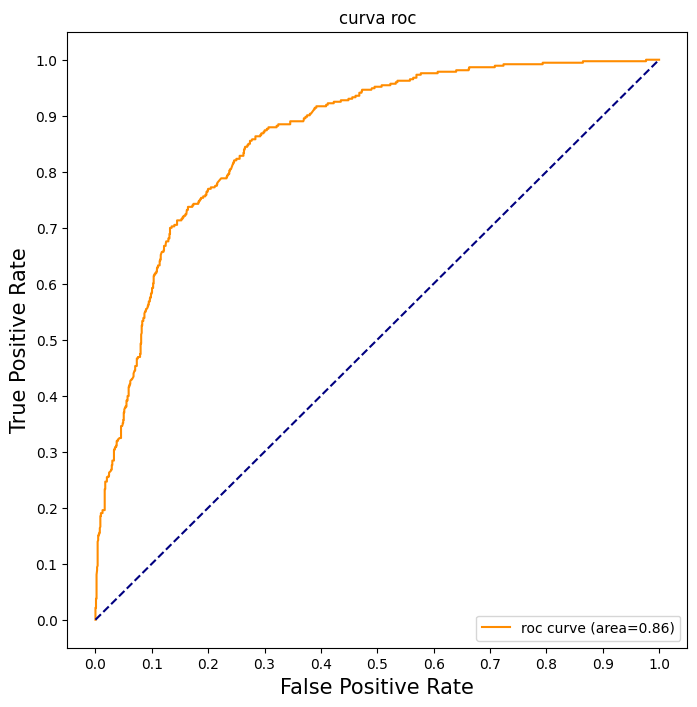

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

fpr,tpr, thresholds= roc_curve(y_test,modelXGBC.predict_proba(x_test) [:,1])
roc_auc=auc(fpr,tpr)

fig, ax = plt.subplots(figsize = (8, 8))
plt.plot(fpr,tpr, color ='darkorange', label ="roc curve (area=%0.2f)"% roc_auc)
plt.plot([0,1],[0,1], color = 'navy', linestyle='--')

ax.set_xlabel("False Positive Rate", fontsize = 15)
ax.set_ylabel("True Positive Rate", fontsize = 15)

ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))

plt.title('curva roc')
plt.legend(loc="lower right")
plt.show

In [ ]:
#Undersampling XGBC, after feature elimination with RFECV
modelXGBCUnderSampling = xgb.XGBClassifier(objective='binary:logistic',random_state=42)
modelXGBCUnderSampling.fit(nuevoxtrain, y_rus)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Undersampling
y_pred =modelXGBCUnderSampling.predict(nuevoxtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Undersampling:", accuracy)
print(classification_report(y_test, y_pred))
#We prefer a better recall for class 1, so we choose this model.

Accuracy Undersampling: 0.7359829666430092
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1036
         1.0       0.50      0.79      0.61       373

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

#LogisticRegression with Imbalance Data and using weights
lr = LogisticRegression(random_state=42,  max_iter=200)
lr.fit(x_train, y_train,sample_weight=sample_weights)

#For LogisticRegression the best results were obtained using Imbalance data and sample weights.

LogisticRegression(max_iter=200, random_state=42)

In [ ]:
y_pred2 = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred2))


Accuracy: 0.7608232789212207
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.82      1036
         1.0       0.53      0.83      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
value_counts = dict(df["Churn_1"].value_counts())
print(value_counts)

{0.0: 5174, 1.0: 1869}


In [ ]:
for key , value in value_counts.items():
    value_counts[key] = value/len(df)
print(value_counts)

{0.0: 0.7346301292063041, 1.0: 0.2653698707936959}


In [ ]:
#Compute weights to use in DecisionTree and RandomForestClassifier
class_weights2 = {}
for key , value in value_counts.items():
    class_weights2[key] = sum(value_counts.values()) - value / sum(value_counts.values())
class_weights2

{0.0: 0.2653698707936959, 1.0: 0.7346301292063041}

In [ ]:
tree = DecisionTreeClassifier(random_state=0, max_depth = 8 ,class_weight=class_weights2)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))
#For DecisionTreeClassifier the best results were obtained using Imbalance data and class_weight, obtaining a recall of 0.83 in class 1.

Accuracy on training set: 0.759
Accuracy on test set: 0.705


In [ ]:
y_pred3 = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred3))

Accuracy: 0.7054648687012065
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77      1036
         1.0       0.47      0.83      0.60       373

    accuracy                           0.71      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.71      0.72      1409



**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#RandomForest with imbalanced data and weights.
rf_model = RandomForestClassifier(max_samples=0.4,min_samples_leaf=10,max_leaf_nodes=75,min_samples_split=4,max_depth=200,n_estimators=900,random_state =42,criterion = 'gini')
rf_model.fit(Xtrain, y_rus)
#RandomForest is afected by imbalanced data

RandomForestClassifier(max_depth=200, max_leaf_nodes=75, max_samples=0.4,
                       min_samples_leaf=10, min_samples_split=4,
                       n_estimators=900, random_state=42)

In [ ]:
y_pred2 = rf_model.predict(Xtest)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred2))

Accuracy: 0.7636621717530163
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82      1036
         1.0       0.53      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.79      0.74      1409
weighted avg       0.82      0.76      0.78      1409



In [ ]:
#RandomForestClassifier with RFECV, selecting the best features.
from sklearn.feature_selection import RFECV

rf_model2 = RandomForestClassifier(n_estimators=500,random_state =42)

rfecv = RFECV(rf_model2 , step = 1, min_features_to_select = 20 ,cv=5, n_jobs = -1)
rfecv.fit(x_train , y_train)

RFECV(cv=5, estimator=RandomForestClassifier(n_estimators=500, random_state=42),
      min_features_to_select=20, n_jobs=-1)

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False, False])

In [ ]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 10,  7,  1,  1,  1,  1, 11,  1,  8,  1,
        6,  1,  4,  1,  5,  1,  9,  1,  1,  1,  1,  3,  2])

In [ ]:
selected_features = np.where(rfecv.support_)[0]
nuevoxtrain = x_train[:,selected_features]
nuevoxtest = x_test[:,selected_features]

In [ ]:
rf_model3 = RandomForestClassifier(class_weight = class_weights2,max_samples=0.4,min_samples_leaf=10,max_leaf_nodes=75,min_samples_split=4,max_depth=200,n_estimators=900,random_state =42,criterion = 'gini')
rf_model3.fit(nuevoxtrain, y_train)

RandomForestClassifier(class_weight={0.0: 0.2653698707936959,
                                     1.0: 0.7346301292063041},
                       max_depth=200, max_leaf_nodes=75, max_samples=0.4,
                       min_samples_leaf=10, min_samples_split=4,
                       n_estimators=900, random_state=42)

In [ ]:
y_pred4 = rf_model3.predict(nuevoxtest)
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred4))
#Using RFECV we obtain a recall of 0.80 in class 1, we get the same score with less features

Accuracy: 0.7835344215755855
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84      1036
         1.0       0.56      0.80      0.66       373

    accuracy                           0.78      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.82      0.78      0.79      1409



**PCA and LogisticRegression**

In [ ]:
x = df.drop(columns=['Churn_1'])
y = df['Churn_1']

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = x.copy()

# numerical features
num_cols = ['tenure','MonthlyCharges','TotalCharges']

# standardization on numerical features
for i in num_cols:
  # fit on training data column
  scale = StandardScaler().fit(X_train_stand[[i]])

  # transform the training data column
  X_train_stand[i] = scale.transform(X_train_stand[[i]])

  # transform the testing data column
  #X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
X_train_stand.shape

(7043, 30)

**PCA**

In [ ]:
#IMPLEMENTING PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
#pca.fit(X_train_stand)

transformed_x = pca.fit_transform(X_train_stand)
X2D_sklearn = pca.transform(x)

In [ ]:
pca.explained_variance_ratio_

array([0.3921813 , 0.18679595, 0.0609905 , 0.0351584 , 0.0331511 ,
       0.03054882, 0.02832524, 0.02607245, 0.02514621, 0.02293778,
       0.01907701, 0.01888551, 0.01770039, 0.01674631, 0.01594517])

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.929662153383855

In [ ]:
pca.components_

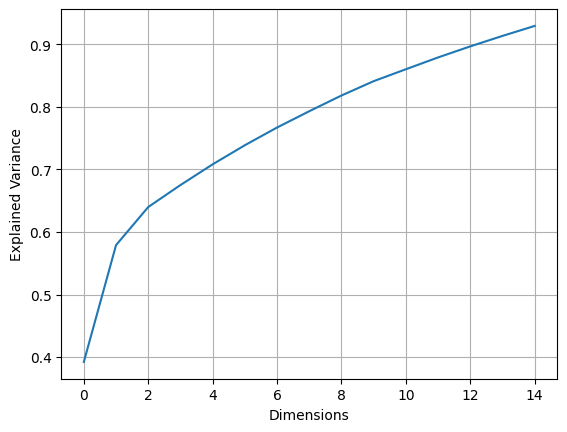

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

#With 15 characteristics, we can explain the 92.9% data variance.

In [ ]:
transformed_x.shape

(7043, 15)

In [ ]:
#Train a LogisticRegression model with 15 features
X_train_stand, X_test_stand, Y_train, Y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=42)

In [ ]:
print(Y_train.shape)

(5634,)


In [ ]:
#Using sample weights, only in case we dont use oversampling/undersampling
from sklearn.utils.class_weight import compute_sample_weight
sample_weightsforpca = compute_sample_weight(
    class_weight='balanced',
    y=Y_train
)

**Train a LogisticRegression model with 15 features from PCA**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr40 = LogisticRegression(random_state=42)
lr40.fit(X_train_stand, Y_train, sample_weight=sample_weightsforpca)

LogisticRegression(random_state=42)

In [ ]:
#PCA=15, 92.9% explained_variance, using sample weights
y_pred40 = lr40.predict(X_test_stand)
accuracy = accuracy_score(Y_test, y_pred40)
print("Accuracy :", accuracy)
print(classification_report(Y_test, y_pred40))

Accuracy : 0.7650816181689141
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.82      1036
         1.0       0.54      0.82      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



**Model Evaluation for our best model XGBCLASSIFIER**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Imbalanced data with Weights
modelXGBC = xgb.XGBClassifier(objective='binary:logistic',random_state=42,learning_rate=0.01,max_depth=2, n_estimators=800 )
modelXGBC.fit(nuevoxtrain, y_train,sample_weight=sample_weights)

In [ ]:
selected_features = np.where(rfecv.support_)[0]
nuevoxtrain = Xtrain[:,selected_features]
nuevoxtest = Xtest[:,selected_features]

In [ ]:
"""

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
Xtrain = norm.transform(x_train)

# transform testing dataabs
Xtest = norm.transform(x_test)

#Using sample weights, only in case we dont use oversampling/undersampling
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)"""

In [ ]:
x_train.shape
#train_idx.shape 4507

(5634, 30)

In [ ]:
x = x.values
y= y.values

#k-folds cross validation

In [ ]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)

test_scores = []
for train_idx , test_idx in k_fold.split(x):
    Xtrainmodvald = x[train_idx]

    # fit scaler on training data
    normModvalid = MinMaxScaler().fit(Xtrainmodvald)

    # transform training data
    Xtrainmodvald = normModvalid.transform(Xtrainmodvald)

    Xtrainmodvald = Xtrainmodvald[:,selected_features]


    Ytrainmodvald = y[train_idx]


    Xtestmodvald = x[test_idx]
    Ytestmodvald = y[test_idx]

    # transform testing dataabs
    Xtestmodvald = normModvalid.transform(Xtestmodvald)

    Xtestmodvald = Xtestmodvald[:,selected_features]



    #Using sample weights, only in case we dont use oversampling/undersampling
    from sklearn.utils.class_weight import compute_sample_weight
    sample_weightsModVal = compute_sample_weight(
    class_weight='balanced',
    y=Ytrainmodvald)

    modelXGBC = xgb.XGBClassifier(objective='binary:logistic',random_state=42,learning_rate=0.01,max_depth=2, n_estimators=800 )
    modelXGBC.fit(Xtrainmodvald, Ytrainmodvald,sample_weight=sample_weightsModVal)

    #model = LogisticRegression()
    #model.fit(Xtrainmodvald , Ytrainmodvald)

    test_scores.append(modelXGBC.score(Xtestmodvald , Ytestmodvald))

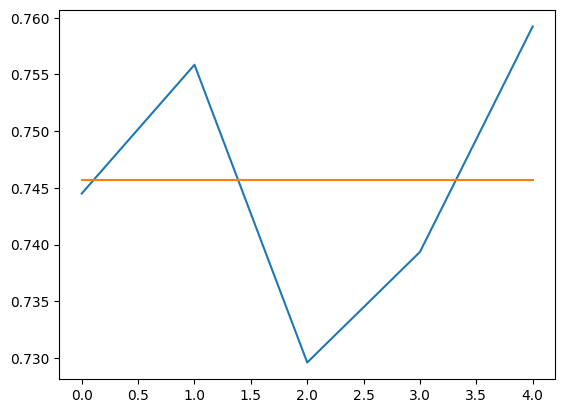

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_scores)
plt.plot([np.mean(test_scores)]*len(test_scores))
plt.show()

**Complexity Analysis**

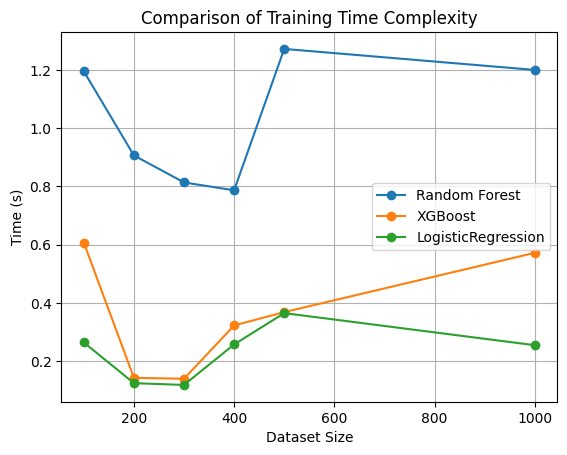

In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt


#5634
# Generating synthetic dataset (replace with your data)
n = 1000  # Number of samples
d = 20  # Number of features
X = np.random.rand(n, d)  # Features
y = np.random.randint(0, 2, n)  # Binary labels

# Varying dataset sizes
dataset_sizes = [100, 200, 300, 400, 500, 1000]
rf_times = []
xgb_times = []
logistic_times=[]

for size in dataset_sizes:
    # Random Forest training time
    start_time = time.time()
    clf_rf = RandomForestClassifier(n_estimators=100)  # You can adjust parameters
    clf_rf.fit(x_train, y_train)
    end_time = time.time()
    rf_elapsed_time = end_time - start_time
    rf_times.append(rf_elapsed_time)

    # XGBoost training time
    start_time = time.time()
    clf_xgb = xgb.XGBClassifier(n_estimators=100)  # You can adjust parameters
    clf_xgb.fit(x_train,y_train)
    end_time = time.time()
    xgb_elapsed_time = end_time - start_time
    xgb_times.append(xgb_elapsed_time)

    # LogisticRegression training time
    start_time = time.time()
    lr = LogisticRegression(random_state=42,  max_iter=200)
    lr.fit(x_train, y_train)
    end_time = time.time()
    xgb_elapsed_time = end_time - start_time
    logistic_times.append(xgb_elapsed_time)

# Plotting
plt.plot(dataset_sizes, rf_times, marker='o', label='Random Forest')
plt.plot(dataset_sizes, xgb_times, marker='o', label='XGBoost')
plt.plot(dataset_sizes, logistic_times, marker='o', label='LogisticRegression')
plt.xlabel('Dataset Size')
plt.ylabel('Time (s)')
plt.title('Comparison of Training Time Complexity')
plt.legend()
plt.grid(True)
plt.show()

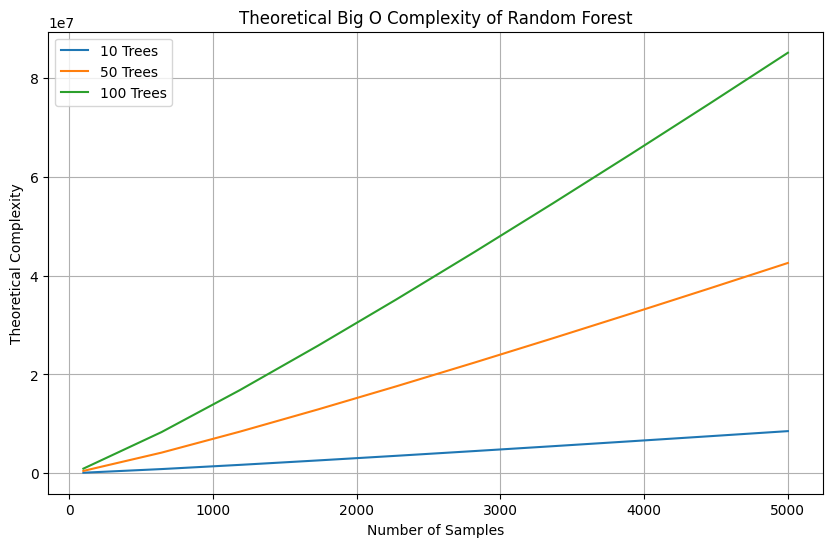

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#The time complexity of training a single decision tree is typically O(m * n log(n)) or O(m * n^2), where:
#n = number of samples
#m = number of features

# Varying number of samples
num_samples = np.linspace(100, 5000, 10, dtype=int)
n_estimators = [10, 50, 100]  # Different number of trees in the forest

# Function to calculate theoretical time complexity
def theoretical_complexity(n, m, num_trees):
    return num_trees * (m * n * np.log(n))  # Just an example for demonstration

plt.figure(figsize=(10, 6))

for trees in n_estimators:
    complexities = [theoretical_complexity(n, 20, trees) for n in num_samples]
    plt.plot(num_samples, complexities, label=f'{trees} Trees')

plt.title('Theoretical Big O Complexity of Random Forest')
plt.xlabel('Number of Samples')
plt.ylabel('Theoretical Complexity')
plt.legend()
plt.grid(True)
plt.show()

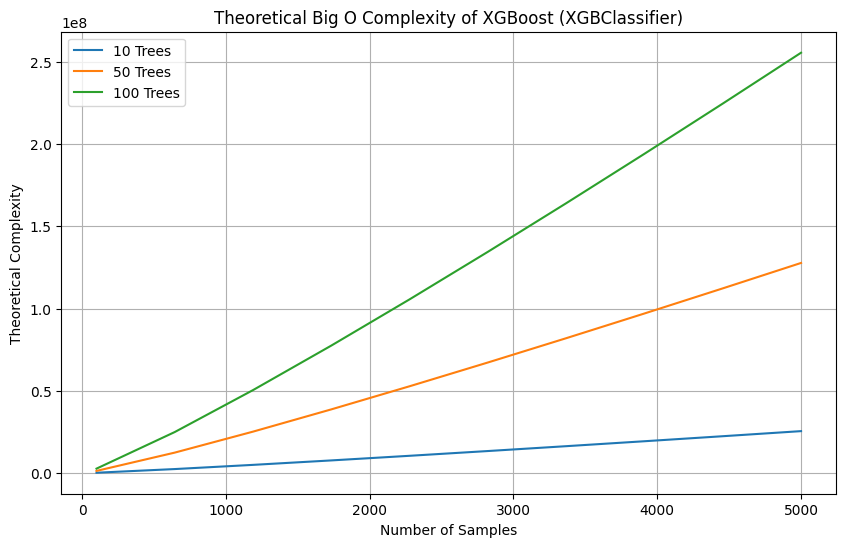

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#The time complexity of XGBoost for training can be approximated as O(n * m * log(n) * num_trees * depth), where:

#n = number of samples
#m = number of features
#num_trees = number of trees
#depth = maximum depth of each tree


# Varying number of samples and trees
num_samples = np.linspace(100, 5000, 10, dtype=int)
num_trees = [10, 50, 100]  # Different number of trees in the XGBoost model
num_features = 20  # Fixed number of features
max_depth = 3  # Fixed maximum depth of each tree

# Function to calculate theoretical time complexity
def theoretical_complexity(n, m, num_trees, depth):
    return n * m * np.log(n) * num_trees * depth

plt.figure(figsize=(10, 6))

for trees in num_trees:
    complexities = [theoretical_complexity(n, num_features, trees, max_depth) for n in num_samples]
    plt.plot(num_samples, complexities, label=f'{trees} Trees')

plt.title('Theoretical Big O Complexity of XGBoost (XGBClassifier)')
plt.xlabel('Number of Samples')
plt.ylabel('Theoretical Complexity')
plt.legend()
plt.grid(True)
plt.show()

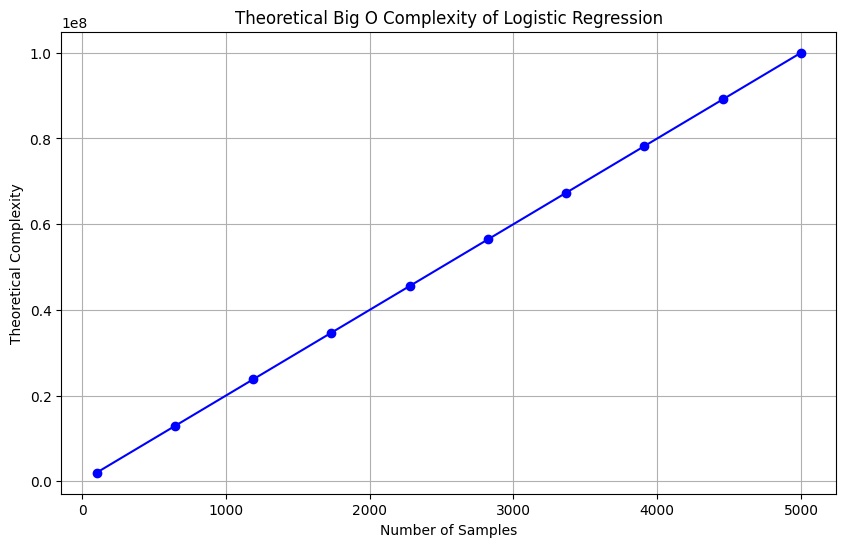

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#The time complexity of Logistic Regression for training is often represented as O(d * n * iter), where:
#d = number of features
#n = number of samples
#iter = number of iterations until convergence

# Varying number of samples
num_samples = np.linspace(100, 5000, 10, dtype=int)
num_features = 20  # Fixed number of features
num_iterations = 1000  # Fixed number of iterations

# Function to calculate theoretical time complexity
def theoretical_complexity(n, d, iterations):
    return d * n * iterations

plt.figure(figsize=(10, 6))

complexities = [theoretical_complexity(n, num_features, num_iterations) for n in num_samples]
plt.plot(num_samples, complexities, marker='o', color='blue')

plt.title('Theoretical Big O Complexity of Logistic Regression')
plt.xlabel('Number of Samples')
plt.ylabel('Theoretical Complexity')
plt.grid(True)
plt.show()

 #Big O complexity of Logistic Regression changes concerning the number of samples.
 #It assumes a fixed number of features and iterations. The plot visualizes the linear relationship between the number of samples and the theoretical complexity in this scenario